In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

%matplotlib inline

In [36]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [37]:
X = iris['data']
y = iris['target']

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

In [39]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### PCA

Using PCA - we can reduce the dimenisionality of the problem to being two variables which still capture >97% of the total variance of the original data.

In [79]:
pca = PCA().fit(X)

In [71]:
explained_variance  = pca.explained_variance_
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance /= np.sum(explained_variance)

([<matplotlib.axis.XTick at 0x1d4040de730>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

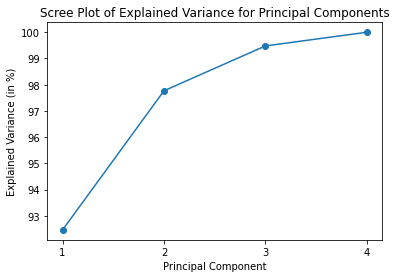

In [72]:
plt.plot(range(1, len(cumulative_variance) + 1), # x-axis
         cumulative_variance*100, # convert explained variance in percentage
         marker='o', # add a marker at each value
        )
plt.title('Scree Plot of Explained Variance for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (in %)')
plt.xticks(range(1, len(explained_variance) + 1))

### Interpreting the PCA

We can inspect the coefficients in the PCA fit to determine which variables are most important in driving the defintions of the PC's. For PC1, we see it mostly a function of petal length, and to a lesser extent, petal_width and sepal length.

In [94]:
loadings = pca.components_

loading_df = pd.DataFrame(loadings, 
                          columns=iris["feature_names"],
                          index=[f"PC{i+1}" for i in range(pca.n_components_)])

print(loading_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC1           0.361387         -0.084523           0.856671          0.358289
PC2           0.656589          0.730161          -0.173373         -0.075481
PC3          -0.582030          0.597911           0.076236          0.545831
PC4          -0.315487          0.319723           0.479839         -0.753657


In [98]:
row_norms = np.linalg.norm(loading_df.values, axis=1)
row_norms = pd.Series(row_norms, index=loading_df.index, name="Norm")
row_norms

PC1    1.0
PC2    1.0
PC3    1.0
PC4    1.0
Name: Norm, dtype: float64

In [101]:
# correlation analysis
eig_vals = pca.explained_variance_
correlations = loadings.T * np.sqrt(eig_vals)

corr_df = pd.DataFrame(
    correlations,
    index=iris["feature_names"],
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

In [102]:
corr_df

,PC1,PC2,PC3,PC4
sepal length (cm),0.743108,0.323446,-0.162770,-0.048707
sepal width (cm),-0.173801,0.359689,0.167212,0.049361
petal length (cm),1.761545,-0.085406,0.021320,0.074081
petal width (cm),0.736739,-0.037183,0.152647,-0.116354


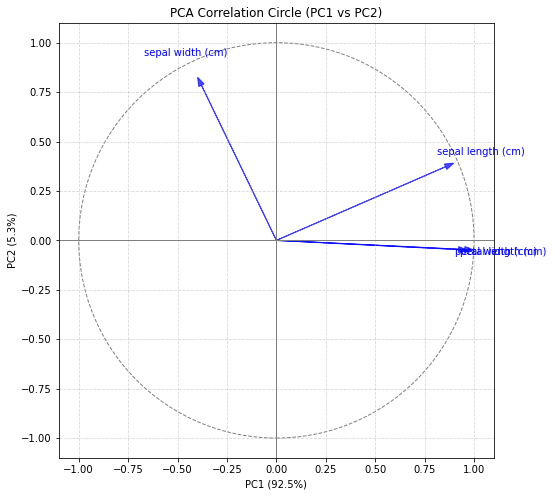

In [105]:
feature_stds = X.std(axis=0, ddof=1)

# Correlations (features x PCs)
correlations = (components.T * np.sqrt(eigenvalues)) / feature_stds[:, np.newaxis]

# Start plot
plt.figure(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Plot feature vectors
for i, feature in enumerate(loading_df.columns):
    plt.arrow(0, 0, correlations[i, 0], correlations[i, 1],
              color='b', alpha=0.7, head_width=0.03, length_includes_head=True)
    plt.text(correlations[i, 0]*1.15, correlations[i, 1]*1.15, feature,
             color='b', ha='center', va='center')

# Axis labels
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")

# Formatting
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.title("PCA Correlation Circle (PC1 vs PC2)")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle='--', alpha=0.5)